# Import dataset

In [37]:
import pandas as pd
from catboost import CatBoostClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [31]:
df_train = pd.read_csv('train_qWM28Yl.csv')
df_train.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [46]:
df_train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [47]:
df_train.describe(include=['O'])

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,44574,56219,35704,44574,38181,33502,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


In [32]:
df_test = pd.read_csv('test_zo1G9sv.csv')
df_test.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2


In [33]:
df_train_take = df_train.copy()
df_test_take = df_test.copy()

In [34]:
df_train_take.drop(['policy_id'], axis=1, inplace=True)
df_test_take.drop(['policy_id'], axis=1, inplace=True)

In [36]:
df_train['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

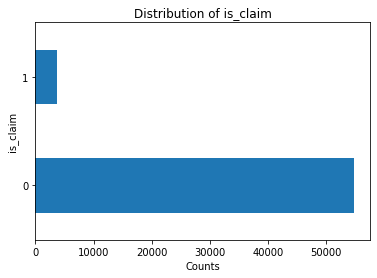

In [44]:
df_train['is_claim'].value_counts().plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('is_claim')
plt.title('Distribution of is_claim')
plt.show()

In [18]:
X = df_train_take.drop(['is_claim'], axis=1)
y = df_train_take['is_claim']
X_test = df_test_take.copy()

# Catboost model

## Give category as index to catboost classifier

In [19]:
categorical_features_indices = np.where((df_train_take.dtypes == object).values.astype(int) == 1)[0]

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# from xgboost import XGBClassifier
# xgbc = XGBClassifier(random_state=0,scale_pos_weight=10)
# xgbc.fit(X_train, y_train)
# y_pred = xgbc.predict(X_test)

In [22]:
catboost_base = CatBoostClassifier(verbose=False,random_state=0, scale_pos_weight=10)
catboost_base.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_val, y_val))

In [23]:
y_pred = catboost_base.predict(X_test)

In [24]:
submission_df = pd.read_csv('sample_submission_KvRh9Sx.csv')
submission_df.head(2)

,policy_id,is_claim
0,ID58593,1
1,ID58594,1


In [25]:
submission_df['policy_id'] = df_test['policy_id']

In [26]:
submission_df['is_claim'] = y_pred

In [27]:
submission_df['is_claim'].value_counts()

0    31793
1     7270
Name: is_claim, dtype: int64

In [28]:
submission_df.to_csv('submission_catboost_best.csv', index=False)

### Feature Engineering that should work

In [7]:
# bool_columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
#                'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger',
#                'is_brake_assist', 'is_power_door_locks','is_central_locking','is_power_steering',
#                 'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']

In [8]:
# replace_bool = {'Yes' : 1,  'No': 0}
# df_train_take[bool_columns] = df_train_take[bool_columns].replace(replace_bool)
# df_test_take[bool_columns] = df_test_take[bool_columns].replace(replace_bool)

In [9]:
# ordinal_col = ['max_torque', 'max_power', 'transmission_type', 'steering_type']
# dummy_columns = ['area_cluster', 'segment', 'model', 'fuel_type', 'rear_brakes_type', 'engine_type']

In [10]:
# df_train_take = pd.concat([df_train_take,pd.get_dummies(df_train_take[dummy_columns])],axis=1)
# df_train_take.drop(dummy_columns, axis=1, inplace=True)

In [11]:
# df_test_take = pd.concat([df_test_take,pd.get_dummies(df_test_take[dummy_columns])],axis=1)
# df_test_take.drop(dummy_columns, axis=1, inplace=True)

In [12]:
# ordinal_col = ['max_torque', 'max_power', 'transmission_type', 'steering_type']

# df_train_take['transmission_type'] = df_train_take['transmission_type'].replace({'Manual' : 1, 'Automatic' : 2})
# df_train_take['steering_type'] = df_train_take['steering_type'].replace({'Manual' : 1, 'Power' : 2, 'Electric': 3})

# df_train_take[['max_torque_Nm', 'max_torque_rpm']] = df_train_take["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))
# df_train_take.drop(["max_torque"], axis=1, inplace= True)
# df_train_take['max_torque_rpm'] = df_train_take['max_torque_rpm'].str[:-3].astype(int)
# df_train_take['max_torque_Nm'] = df_train_take['max_torque_Nm'].str[:-2].astype(float)

# df_train_take[['max_power_bhp', 'max_power_rpm']] = df_train_take["max_power"].apply(lambda x: pd.Series(str(x).split("@")))
# df_train_take.drop(["max_power"], axis=1, inplace= True)
# df_train_take['max_power_rpm'] = df_train_take['max_power_rpm'].str[:-3].astype(int)
# df_train_take['max_power_bhp'] = df_train_take['max_power_bhp'].str[:-3].astype(float)

In [13]:
# df_test_take['transmission_type'] = df_test_take['transmission_type'].replace({'Manual' : 1, 'Automatic' : 2})
# df_test_take['steering_type'] = df_test_take['steering_type'].replace({'Manual' : 1, 'Power' : 2, 'Electric': 3})

# df_test_take[['max_torque_Nm', 'max_torque_rpm']] = df_test_take["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))
# df_test_take.drop(["max_torque"], axis=1, inplace= True)
# df_test_take['max_torque_rpm'] = df_test_take['max_torque_rpm'].str[:-3].astype(int)
# df_test_take['max_torque_Nm'] = df_test_take['max_torque_Nm'].str[:-2].astype(float)

# df_test_take[['max_power_bhp', 'max_power_rpm']] = df_test_take["max_power"].apply(lambda x: pd.Series(str(x).split("@")))
# df_test_take.drop(["max_power"], axis=1, inplace= True)
# df_test_take['max_power_rpm'] = df_test_take['max_power_rpm'].str[:-3].astype(int)
# df_test_take['max_power_bhp'] = df_test_take['max_power_bhp'].str[:-3].astype(float)

In [14]:
# from catboost import CatBoostClassifier

In [15]:
# X_train = df_train_take.drop(['is_claim'], axis=1)
# y_train = df_train_take['is_claim']
# X_test = df_test_take.copy()

In [16]:
# X_train = df_train.drop(['is_claim'], axis=1)
# y_train = df_train['is_claim']
# X_test = df_test.copy()

In [17]:
# df_train_take= pd.get_dummies(df_train_take)
# df_test_take= pd.get_dummies(df_test_take)